<a href="https://colab.research.google.com/github/jimenaminino12/Mineria-datos/blob/main/LAB1_PRACTICA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EJERCICIO 1**





**1.- (1,5 puntos) Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
seleccionamos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.**

En este análisis, vamos a examinar la evolución de la vacunación del COVID-19 en diferentes países utilizando un conjunto de datos llamado "vacunaciones.csv". El objetivo es determinar qué país está llevando a cabo el plan de vacunación más eficiente.

Lo primero, es cargar los datos utilizando la  biblioteca pandas para cargar el conjunto de datos "vacunaciones.csv" en un DataFrame llamado "data". Luego, se muestra una vista previa de los primeros 40 registros del DataFrame.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset
url = "/content/vacunaciones.csv"
data = pd.read_csv(url, sep=',')

In [ ]:
data.head(40)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Como el ejercicio pide que evitemos los "missing_values" de "people_vaccinated" lo primero que debemos hacer, es mostrar cuantos valores faltantes tiene cada país en esa variable

In [ ]:
# Filtrar las filas con valores NaN en 'people_vaccinated'
nan_values = data[data['people_vaccinated'].isna()]

# Contar el número de valores NaN por país
nan_values_per_country = nan_values.groupby('country').size()

# Imprimir los resultados
print("Número de valores NaN en 'people_vaccinated' por país:")
print(nan_values_per_country)

Número de valores NaN en 'people_vaccinated' por país:
country
Albania                     18
Algeria                      2
Andorra                     14
Anguilla                     8
Argentina                   25
                            ..
Turks and Caicos Islands    28
United Arab Emirates        41
United Kingdom              24
United States               14
Wales                       26
Length: 72, dtype: int64


Como podemos observar, hay variables Nan en varios paises por lo que tendremos que rellenar estos valores seleccionando los datos de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para rellenar dicha celda.

Tenemos que tener encuenta que pide los días por lo que habrá que comprobar si faltan algunos días y en que paises faltan.




In [ ]:
data = data.sort_values(by=['country', 'date'])

# Itera sobre cada país en el DataFrame
for country, group in data.groupby('country'):
    # Convierte la columna 'date' a tipo datetime
    group['date'] = pd.to_datetime(group['date'])

    # Crea un rango de fechas que cubra el período completo para el país actual
    full_date_range = pd.date_range(start=group['date'].min(), end=group['date'].max())

    # Verifica si hay alguna fecha faltante en el rango completo
    missing_dates = full_date_range[~full_date_range.isin(group['date'])]

    # Imprime el resultado
    if not missing_dates.empty:
        print(f"Para el país {country} faltan las siguientes fechas:")
        print(missing_dates)
    else:
        print(f"Para el país {country} no faltan fechas.")

Para el país Albania no faltan fechas.
Para el país Algeria no faltan fechas.
Para el país Andorra no faltan fechas.
Para el país Anguilla no faltan fechas.
Para el país Argentina no faltan fechas.
Para el país Austria no faltan fechas.
Para el país Azerbaijan no faltan fechas.
Para el país Bahrain no faltan fechas.
Para el país Bangladesh no faltan fechas.
Para el país Belgium no faltan fechas.
Para el país Bermuda no faltan fechas.
Para el país Bolivia no faltan fechas.
Para el país Brazil no faltan fechas.
Para el país Bulgaria no faltan fechas.
Para el país Cambodia no faltan fechas.
Para el país Canada faltan las siguientes fechas:
DatetimeIndex(['2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-10', '2021-01-11'],

Como solo dos paises no tienen todos los días seguidos, consideramos que no afecta al análisis por lo tanto consideramos que están ordenados y que la media se realizará con los anteriores valores de los paises.

Una vez analizado los datos, se realiza el preprocesamiento de los datos para evitar los "missing values" en la columna "people_vaccinated". El código ordena los datos por país y fecha, y luego itera sobre cada fila del DataFrame para rellenar los valores faltantes utilizando la media de los 3 días anteriores.

In [ ]:
# Ordenar los datos por país y restablecer los índices
data = data.sort_values(by=['country', 'date']).reset_index(drop=True)

# Iterar sobre cada fila del DataFrame
for i in range(len(data)):
    # Verificar si el valor es nulo
    if pd.isnull(data.loc[i, 'people_vaccinated']):
        # Obtener el país actual
        current_country = data.loc[i, 'country']

        # Inicializar variables para calcular la media
        sum_values = 0
        count_values = 0

        # Iterar hacia atrás en el DataFrame para obtener los valores anteriores del mismo país
        j = i - 1
        while j >= 0 and data.loc[j, 'country'] == current_country:
            if pd.notnull(data.loc[j, 'people_vaccinated']):
                sum_values += data.loc[j, 'people_vaccinated']
                count_values += 1

                if count_values == 3:
                    break
            j -= 1

        # Calcular la media de los valores anteriores
        if count_values > 0:
            average = sum_values / count_values
            data.loc[i, 'people_vaccinated'] = average

data.head(50)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.000000,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,0.000000,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.000000,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.000000,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.000000,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.000000,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.000000,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.000000,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.000000,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.000000,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Una vez suplidos los "missing_values", comprobamos si aún queda algun valor NaN, si es el caso, significa que el país no tiene ningún dato anterior para poder rellenarlo por consiguiente podemos eliminar esa observación.

In [ ]:
# Filtrar las filas con valores NaN en 'people_vaccinated' y agrupar por país
nan_values_per_country = data[data['people_vaccinated'].isna()].groupby('country').size()

# Imprimir los resultados para los países con valores NaN en 'people_vaccinated'
if not nan_values_per_country.empty:
    print("Países con valores NaN en 'people_vaccinated':")
    print(nan_values_per_country)
else:
    print("No hay países con valores NaN en 'people_vaccinated'.")

Países con valores NaN en 'people_vaccinated':
country
Algeria                  2
Argentina               22
Bolivia                 15
China                   57
Costa Rica              22
Cyprus                  16
Egypt                    7
Estonia                 31
Finland                 25
Hungary                 21
India                   32
Indonesia               16
Ireland                 27
Isle of Man              4
Kuwait                  30
Liechtenstein            8
Maldives                13
Monaco                  20
Morocco                 19
Myanmar                  8
Nepal                   10
Netherlands             41
Northern Cyprus          9
Panama                  28
Qatar                   38
Saint Helena             1
Saudi Arabia            40
Sri Lanka               18
Switzerland             50
Turkey                  30
United Arab Emirates     5
dtype: int64


Como muestran los datos, todos estos paises todavía tienen valores Nan tras haber aplicado la función que rellena dichos valores. Por lo que hemos decidido eliminar estas observaciones ya que consediramos que no aportan valor al estudio de "people_vaccinated".

In [ ]:
# Eliminar las filas con valores NaN en la columna 'people_vaccinated'
data = data.dropna(subset=['people_vaccinated'])

# Filtrar las filas con valores NaN en 'people_vaccinated' y agrupar por país
nan_values_per_country = data[data['people_vaccinated'].isna()].groupby('country').size()

# Imprimir los resultados para los países con valores NaN en 'people_vaccinated'
if not nan_values_per_country.empty:
    print("Países con valores NaN en 'people_vaccinated':")
    print(nan_values_per_country)
else:
    print("No hay países con valores NaN en 'people_vaccinated'.")

No hay países con valores NaN en 'people_vaccinated'.


Tras realizar todo esto, podemos concluir que la base de datos esta limpia de "missing values" en la variable "people_vaccinated".

**2.- (1 punto) De aquellos 5 países que han vacunado más días en total, compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.**

Ahora realizaremos un estudio para comprobar que 5 paises han vacunado más dias en total.
Al ir analizando la base de datos anteriormente, vimos que aparecia un territorio Británico de Ultramar. Por lo que, lo primero es comprobar si aparecen más territorios.

In [ ]:
# Lista de territorios de ultramar del Reino Unido
territorios_ultramar = [
    'Anguilla', 'Ascension', 'Bermuda', 'British Virgin Islands',
    'Cayman Islands', 'Falkland Islands', 'Gibraltar', 'Montserrat',
    'St Helena', 'Tristan da Cunha', 'Turks and Caicos Islands'
]

# Filtrar el DataFrame para los territorios de ultramar del Reino Unido
territorios_ultramar_data = data[data['country'].isin(territorios_ultramar)]

# Iterar sobre cada territorio de ultramar
for territorio in territorios_ultramar:
    # Filtrar los datos para el territorio actual
    territorio_data = territorios_ultramar_data[territorios_ultramar_data['country'] == territorio]

    # Calcular el número de días únicos en los que se registraron datos de vacunación para el territorio actual
    num_dias = territorio_data['date'].nunique()

    # Imprimir el número de días para el territorio actual
    print(f"Número de días en los que se registraron datos de vacunación para {territorio}: {num_dias}")


Número de días en los que se registraron datos de vacunación para Anguilla: 10
Número de días en los que se registraron datos de vacunación para Ascension: 0
Número de días en los que se registraron datos de vacunación para Bermuda: 31
Número de días en los que se registraron datos de vacunación para British Virgin Islands: 0
Número de días en los que se registraron datos de vacunación para Cayman Islands: 49
Número de días en los que se registraron datos de vacunación para Falkland Islands: 0
Número de días en los que se registraron datos de vacunación para Gibraltar: 36
Número de días en los que se registraron datos de vacunación para Montserrat: 0
Número de días en los que se registraron datos de vacunación para St Helena: 0
Número de días en los que se registraron datos de vacunación para Tristan da Cunha: 0
Número de días en los que se registraron datos de vacunación para Turks and Caicos Islands: 30


Dado que el objetivo es determinar cuál es el país que está llevando a cabo el plan de vacunación más eficiente, hemos llegado a la conclusión de que estos territorios no se consideran como tal un país ya que pertenecen a territorio Británico por lo que consideramos eliminar a todos estos territorios además de United Kingdom, nombre en inglés del Reino Unido de Gran Bretaña e Irlanda del Norte, Estado soberano ubicado en el noroeste de la Europa Continental,  ya que está compuesto por países individuales como Inglaterra, Gales, Escocia e Irlanda del Norte, y se observa que tienen datos de vacunación independientes



Después claculamos el total de días de vacunación para cada país y seleccionamos los cinco países con más días de vacunación.



In [ ]:
territorios_ultramar = ['Anguilla', 'Ascension', 'Bermuda', 'British Virgin Islands',
                        'Cayman Islands', 'Falkland Islands', 'Gibraltar', 'Montserrat',
                        'St Helena', 'Tristan da Cunha', 'Turks and Caicos Islands']

# Filtrar las filas que no pertenecen al Reino Unido ni a sus territorios de ultramar
data = data[~data['country'].isin(['United Kingdom'] + territorios_ultramar)]


# Calcular el total de días de vacunación para cada país
days_vaccinated = data.groupby('country').size().sort_values(ascending=False)

# Seleccionar los cinco países con más días de vacunación en total
top_countries = days_vaccinated.head(5).index

# Filtrar la base de datos solo para los cinco países seleccionados
data_top_countries = data[data['country'].isin(top_countries)]

days_vaccinated_per_country = data.groupby('country')['date'].nunique()
days_vaccinated_per_country = days_vaccinated_per_country.sort_values(ascending=False)
days_vaccinated_per_country.head(7)


country
Wales               64
Scotland            64
Northern Ireland    64
England             64
Israel              59
Russia              58
United States       57
Name: date, dtype: int64

 Para visualizar esta comparación, usamos un gráfico de líneas,  para comparar la evolución de la vacunación en los cinco países seleccionados, ya que nos permite observar fácilmente cómo varía el número de vacunaciones a lo largo del tiempo para cada país.

 Se  muestra el número total de personas vacunadas en el eje y y la fecha en el eje x.


<ipython-input-81-65e7541fad3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_countries['date'] = pd.to_datetime(data_top_countries['date'], format='%Y-%m-%d')


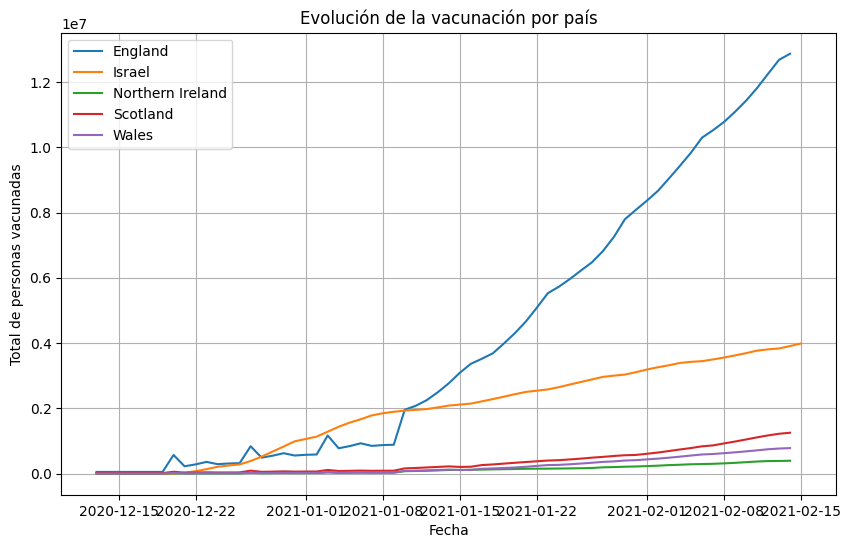

In [ ]:
# Convertir la columna 'date' a tipo datetime
data_top_countries['date'] = pd.to_datetime(data_top_countries['date'], format='%Y-%m-%d')

# Crear un gráfico de líneas para comparar la evolución en el tiempo de los cinco países
plt.figure(figsize=(10, 6))
for country, group in data_top_countries.groupby('country'):
    plt.plot(group['date'], group['people_vaccinated'], label=country)

plt.title('Evolución de la vacunación por país')
plt.xlabel('Fecha')
plt.ylabel('Total de personas vacunadas')
plt.legend()
plt.grid(True)
plt.show()


Según los datos obtenidos tras el analisis, Inglaterra es el país que tiene un plan de vacunación  más constante.

Esto se debe a que la tasa de vacunación ha ido aumentando de manera regular desde el primer día recogido en la base de datos hasta el último.

Las únicas caidas en la tasa de vacunacion son muy leves lo que puede indicar que la situacion con respecto al COVID-19  estaba en constante evolución pudiendo respresentar distintos problemas , pero más adelante el plan se ha mantenido de una manera muy eficiente, llegando así a una tasa de vacunación actual en Inglaterra de aproximadamente 1.2 millones de personas por día.